<a href="https://colab.research.google.com/github/aquemi/analise_sentimentos/blob/main/teste_completo_analise_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste NLP com dados do Kaggle

Os 4 Datasets disponíveis são compostos por:


    Tweets with Theme: collected using around 100 political terms together with positive and negative emoticons. Contains around 60k tweets.

    No Theme Tweets: collected using only positive and negative emoticons. Contains around 780k tweets.

    Neutral Tweets from Hashtags: collected using hashtags. Contains around 15k tweets.

    Neutral Tweets from News accounts: collected directly from popular news accounts. Contains around 35k tweets.

*1. Com esse dataset tão variado que tipo de soluções acha possível implementar?*

Algumas soluções poderiam ser desenvolvidas, considerando o período da coleta dos dados:
1. Utilizar o dataset com os termos políticos e predizer tendências de sentimento com relação à algum acontecimento político naquele mês/período;
2. Identificar algum tipo de insatisfação, seja de um produto ou relacionada à alguma notícia em determinado local.
3. Identificação de sentimentos a partir de hashtags específicas e como isso varia em diferentes regiões do Brasil.

### 2. Imagine que tenha que desenvolver dois serviços:

*● Identificar se o tweet se refere a um produto*

*● Identificar se ele cita alguma vaga de emprego
Escolha um dos projetos e mapeie os requisitos e as necessidades para o desenvolvimento, que tarefas teria que fazer, quais técnicas usaria e porque.*

#### Proposta de desenvolver um serviço que identifica se o tweet cita alguma vaga de emprego:

Requisitos:
1. Coleta dos dados:
Inicialmente precisamos obter um conjunto de tweets que citam vagas de emprego e rotulamos eles dessa forma. Podemos obter a partir de hashtags específicas como #vagadeemprego ou #oportunidade. Todos que citam a vaga podem receber o rótulo 1.
Outra classe que podemos ter são de tweets que não são vaga de emprego, sem temas ou hashtags específicas, que recebem o rótulo 0.

2. Organizar esses dados em um dataframe, juntamente com os rótulo.

3. Tratamento de dados:
Inicialmente importamos as bibliotecas necessárias para o pré-processamento dos textos. Nesta etapa precisamos prepará-los de uma forma que possam ser processados numericamente.

Podemos começar pré-processando os tweets com a técnica de *tokenizar*, ou seja dividir a frase em palavras.
Em seguida, podemos pensar na remoção de ruídos, ou seja retirar caracteres que não são relevantes para identificar o que queremos. Estes caracteres incluem preposições (stop words), pontuação ou números. Podemos usar também *expressão regular* para identificar caracteres indesejados e removê-los.

Em seguida, teremos os termos mais relevantes e palavras-chave, assim podemos usar a biblioteca *Natural Language Toolkit* para normalizar as palavras, ou seja padronizar todos os caracteres em letras minúsculas, dessa forma "Carro" ou "CARRO" ficarão com a grafia "carro".
Podemos ainda usar técnicas de Lemmatizar ou Stemming, ambas reduzem ainda mais o texto e focam na raiz da palavra. Seria interessante testar as duas formas e checar o desempenho do modelo caso ele não performe bem inicialmente.
Outra técnica que pode contribuir também é aplicar uma função de gramática e que categoriza as palavras em verbo, adjetivo ou substantivo.
Após esse pré-processamento inicial, teremos que vetorizar os tweets de forma que possam ser representados por números.

4. Separação dos dados:
70% dos dados para treino;
30% para teste;
Base externa para teste de algum outro período;

5. Construção do modelo
Podemos usar um modelo simples de Naive Bayes, que é comumente utilizado para identificar se um e-mail é SPAM ou não. Esse modelo não considera a relação entre as palavras no texto mas a frequência de termos para a classificação.

6. Análise de desempenho e melhorias
Podemos gerar uma matriz de confusão, extrair métricas de desempenho como acurácia e F1-score.

7. Implementação em um fluxo contínuo de desenvolvimento;

3. É possível desenvolver alguma parte do item acima com os dados que você tem? Se sim,
resolva o possível no tempo disponibilizado.

In [1]:
import pandas as pd

In [2]:
from google.colab import drive #os dados do Kaggle foram colocados em uma pasta no GDrive e podemos importa-los para trabalhar neste documento.
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [3]:
tweets_hash = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis/archive/TweetsNeutralHash.csv') #escolhi utilizar essa base com Tweets neutros e verificar as hashtags associadas.

In [4]:
tweets_hash.head(2)

,id,tweet_text,tweet_date,sentiment,query_used
0,1027376569449410562,@dilsonramoslima #Fato Acho que o Roger é um b...,Thu Aug 09 02:10:36 +0000 2018,Neutro,#fato
1,1026566106599833600,#NOVIDADE! @LATAM_BRA acaba de anunciar novo v...,Mon Aug 06 20:30:07 +0000 2018,Neutro,#novidade


In [5]:
tweets_hash.info() #identificação das colunas no dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15727 entries, 0 to 15726
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          15727 non-null  int64 
 1   tweet_text  15727 non-null  object
 2   tweet_date  15727 non-null  object
 3   sentiment   15727 non-null  object
 4   query_used  15727 non-null  object
dtypes: int64(1), object(4)
memory usage: 614.5+ KB


In [6]:
tweets_hash['query_used'].value_counts() #agrupamento das hashtags e quantidade de cada uma

#fato            5486
#trabalho        3951
#oportunidade    2911
#noticia         1622
#novidade        1275
#curiosidade      482
Name: query_used, dtype: int64

Com base nas hashtags e nos textos podemos *começar a selecionar* os tweets relacionados à vagas de emprego para anotação dos dados:

In [7]:
hash_interesse = ['oportunidade', 'trabalho']
hashtags = '|'.join(hash_interesse)

Anotação dos tweets que são vagas de emprego com o rótulo 1

In [8]:
vagas = tweets_hash[tweets_hash.query_used.str.contains(hashtags)]
vagas['label'] = 1

<ipython-input-8-ce47d8cfc013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vagas['label'] = 1


Anotação dos tweets que não são vagas de emprego com o rótulo 0

In [9]:
outras_hash = ['fato', 'noticia','curiosidade']
hashtags = '|'.join(outras_hash)

In [10]:
no_vagas = tweets_hash[tweets_hash.query_used.str.contains(hashtags)]
no_vagas['label'] = 0

<ipython-input-10-bb26295a856c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_vagas['label'] = 0


Concatenamos as tabelas e vemos que as classes estão balanceadas:

In [11]:
vagas_total = pd.concat([vagas, no_vagas])

In [12]:
vagas_total.label.value_counts()

0    7590
1    6862
Name: label, dtype: int64

In [13]:
import matplotlib.pyplot as plt

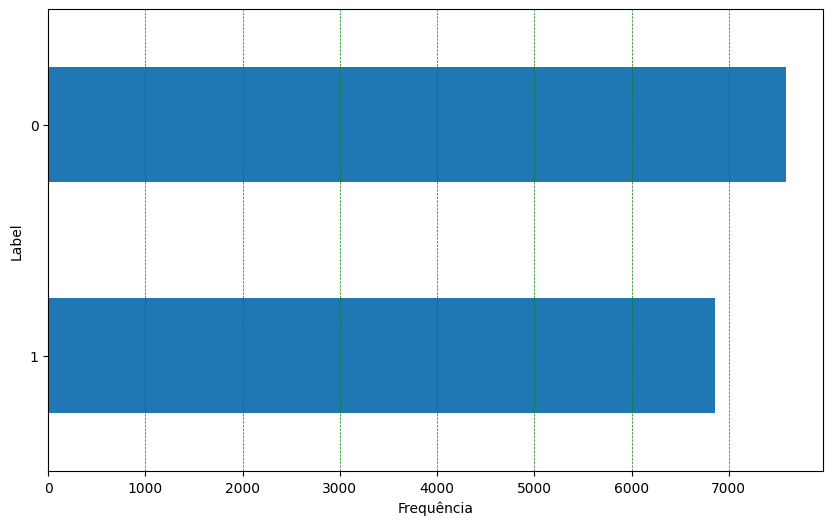

In [14]:
plot1 = vagas_total.label.value_counts()
fig = plt.figure(figsize=(10,6))
plot1[:].sort_values().plot(kind='barh')
plt.xlabel('Frequência')
plt.ylabel('Label')
plt.grid(axis = 'x', color = 'green', linestyle = '--', linewidth = 0.5)
#fig.savefig('studygraph2.png', dpi=300,bbox_inches='tight')

Checando as anotações:

In [15]:
vagas_total.tweet_text[30], vagas_total.label[30]

('#Notícia: Caern 115 fará manutenção na Adutora I do Jiqui e 10 bairros de Natal serão afetados pelo desabastecimento de água, confira os bairros afetados https://t.co/zSwuwlDLH9',
 0)

Embora aqui eu tenha mostrado uma forma inicial para anotar os dados, eu precisaria de mais tempo de dedicação para fazer uma análise de qualidade das anotações a fim de verificar se todas as frases com hashtag #trabalho e #oportunidade são de fato vaga de emprego. Para isso, uma alternativa seria começar criando um dataset menor, cerca de 50 tweets que comumente caracterizam uma vaga de emprego, tais como como local, contato, requisitos mínimos, anos de experiência e cargo. Essas variáveis definem o que caracteriza o que queremos identificar.

Como o dataset é extenso, uma alternativa à anotação manual seria usar uma IA para gerar tweets baseados nos groundtruths, apenas variando os atributos mas mantendo o contexto de vaga de emprego. Com uma boa quantidade de dados, podemos calcular os vetores que irão representar os textos de forma numérica, utilizando o Word2Vec, por exemplo. Em seguida, podemos gerar usar Naive Bayes ou um modelo de Floresta Aleatória para classificar se um texto é vaga de emprego ou não e testar em diversos datasets de redes sociais que anunciam vagas de emprego para verificar o desempenho. Caso o desempenho não seja satisfatório, podemos verificar qual o principal problema, se temos grandes quantidades de:

1. Falso Positivo - não é vaga de emprego, mas o modelo diz que sim
2. Falso Negativo - é vaga de emprego, mas o modelo diz que não

No primeiro caso, o impacto é que o serviço entregue tweets que parecem ser vaga de emprego mas não são. Podemos usar esses casos para identificar se há um padrão em todos esses que o modelo errou. Provavelmente eram tweets semelhantes nas informações, talvez fosse uma pessoa que colocou informações sobre ela mesma para atrair mais oportunidades. Esse é um exemplo de erro que poderia acontecer. Dessa forma, teríamos que analisar os casos de erro para entender quais ou qual foi o fator de confusão para o modelo.

No segundo caso, teríamos o problema de não receber vagas de emprego quando elas são e perder oportunidades. Nesse caso, o modelo pode não ter aprendido muito bem e pode ser repensado na forma que foi treinado. No entanto, podemos ver novamente um padrão nesses casos e verificar se o dado de entrada no modelo seguiu a forma como ele foi desenvolvido para identificar o texto. Por exemplo, o texto analisado pode conter apenas um e-mail ou textos abreviados que não foram identificados corretamente pelo modelo.

Os modelos desenvolvidos terão limitações, no entanto ao analisar essa limitações, é possível escolher um caminho diferente para testar e avançar com o aprendizado. Com esse refinamento, aprimoramos as técnicas e chegamos à excelência.

4. Faça um modelo de análise de sentimentos dos tweets. Analise e descreva os erros e que
técnicas poderia utilizar para melhorá-lo, não é necessário aplicá-las.

In [16]:
treino = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis/archive/TrainingDatasets/Train50.csv',sep=';')

In [17]:
treino.head(2)

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)


Função que remove pontuações, stop words e deixa todas as palavras minúsculas

In [18]:
import string
# Baixa a lista de stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def pre_processing_tweets(texto):
    # Função para remover pontuação
    texto_sem_pontuacao = ''.join([char for char in texto if char not in string.punctuation])
    # Tokenização
    token = texto_sem_pontuacao.split()
    # Obter stopwords em português
    stop_words = set(stopwords.words('portuguese'))
    # Remover stopwords e normalizar palavras para minúsculas
    tokens_sem_stopwords = [token.lower() for token in token if token.lower() not in stop_words]
    return " ".join(tokens_sem_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
treino.tweet_text[0], treino.sentiment[0] #frase inicial

('@Laranjito76 A pessoa certa para isso seria o vale e azevedo :)', 1)

In [20]:
pre_processing_tweets(treino.tweet_text[0]) #após pré processamento

'laranjito76 pessoa certa vale azevedo'

Pré processando os tweets de treino

In [21]:
treino_preprocessed = [] #usamos o dataset com 50 mil tweets e aplicamos a função de pré-processamento
for i in range(len(treino.tweet_text)):
  treino_preprocessed.append(pre_processing_tweets(treino.tweet_text[i]))

In [22]:
len(treino_preprocessed)

50000

 Vamos usar o método CountVectorizer, ele é usado para transformar um determinado texto em um vetor com base na frequência de cada palavra que ocorre em todo o texto. Dessa forma é possível representar numericamente os tweets.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [25]:
treino_vetorizado = cv.fit_transform(treino_preprocessed)

In [26]:
treino_array = treino_vetorizado.toarray()

Checamos se as classes estão balanceadas

In [27]:
y_train = treino['sentiment']

In [28]:
y_train.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
# Treinando o modelo Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(treino_array, y_train)

MultinomialNB()

Teste do modelo Naive Bayes

In [31]:
teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment_Analysis/archive/TestDatasets/Test.csv', delimiter = ';')

In [32]:
y_teste = teste['sentiment']

In [33]:
teste_preprocessed = []
for i in range(len(teste.tweet_text)):
  teste_preprocessed.append(pre_processing_tweets(teste.tweet_text[i]))

In [34]:
teste_vetorizado = cv.transform(teste_preprocessed)

In [35]:
y_pred = nb_classifier.predict(teste_vetorizado.toarray())

In [36]:
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score)

In [39]:
f1 = f1_score(y_pred, y_teste, average="weighted")
acc = accuracy_score(y_teste, y_pred)
print("Accuracy:", acc)
print("F1 Score:", f1)

Accuracy: 0.718
F1 Score: 0.71848886392836


In [42]:
accuracy_score(y_teste, y_pred)

0.718

A primeira limitação pode ocorrer porque ao rotular todos os textos que tem o emoticon ":)" como sentimento positivo (valor=1), pode ser que essa forma de anotação não considere sarcasmos ou ironias, que poderiam ter outro valor associado.
Com relação à vetorização do texto, existem outros algoritmos que não implementamos aqui, como word2vec, bag-of-words e n-gram.

O modelo Naive Bayes também pode ter limitações por não considerar o contexto das palavras e considerá-las independentes. No entanto, o modelo inicial teve uma acurácia de 71,8% que poderia ser melhorada a partir de outras técnicas implementadas.